In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import json
from datetime import datetime
import multiprocessing as mp
import glob

Il segnale cresce con e_F

Quando aumenta il pump, il segnale cresce di meno

|Power | Fluence | Color  |
|------|---------|--------|
|0     | 0       | Red    |
|100   | 10      | Blue   |
|544   | 60      | Green  |
|895   | 100     | Orange |
|1500  | 170     | Black  |
|1800  | 200     | Gray   |

In [2]:
# Read data with THG modulation vs Fermi energy.
base_dir = "./data/04"
saveDir = "%s/2023-08-22_collect_modulations" % base_dir
data_dirs = [
    ("2023-05-21-14-31-11_scan_fermi","OFF"),
    ("2023-05-21-14-50-17_scan_fermi","100"),
    ("2023-05-21-15-26-06_scan_fermi","544"),
    ("2023-05-21-15-40-36_scan_fermi","895"),
    ("2023-05-21-16-05-46_scan_fermi","1500"),
    ("2023-05-21-16-56-44_scan_fermi","1800"),    
]

data_dirs = [
    ("2023-08-22-18-44-29_gamma_fit2","OFF"),
    ("2023-08-22-20-05-14_gamma_fit2","100"),
    ("2023-08-22-20-18-11_gamma_fit2","544"),
    ("2023-08-22-20-29-39_gamma_fit2","895"),
    ("2023-08-22-20-41-22_gamma_fit2","1500"),
    ("2023-08-22-20-54-06_gamma_fit2","1800"),    
]


signal_min_list = []
modulation_list = []
for data_dir in data_dirs:
    signal_min_list.append(np.loadtxt("%s/%s/signal_min.csv" % (base_dir,data_dir[0]), delimiter=","))
    modulation_list.append(np.loadtxt("%s/%s/modulation.csv" % (base_dir,data_dir[0]), delimiter=","))

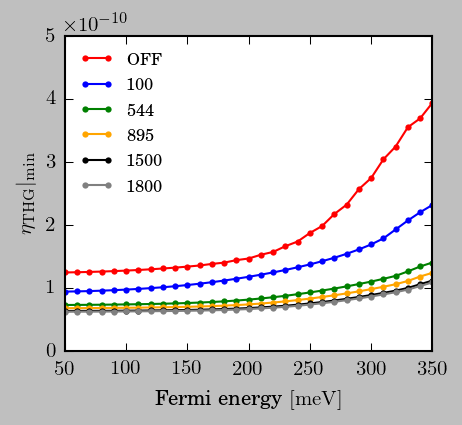

In [9]:
# Plot the modulation as a function of the Fermi energy.
mpl.style.use(["classic", "latex"])
# cmap = mpl.cm.get_cmap("jet")
mycolors = ["red", "blue", "green", "orange", "black", "gray"]
plt.figure(figsize=(3.5,3.0), frameon=True, dpi=150)
plt.axes([0.2, 0.2, 0.7, 0.7])
for ic,(data,info) in enumerate(zip(signal_min_list, data_dirs)):
    plt.plot(data[:,0] * 1.0e+3, data[:,1], "-o", ms=3.0, mec="none", label=info[1], color=mycolors[ic] )  # color=cmap(ic/(len(data_dirs) - 1.0))
#plt.xlim([0.0, 1.0])
plt.ylim([0.0, 0.5e-9])
plt.xlabel(r"Fermi energy $[{\rm meV}]$")
# plt.ylabel(r"$\eta_{\rm THG}$")
plt.ylabel(r"$\eta_{\rm THG}\vert_{\rm min}$")
plt.legend(frameon=False, loc="upper left", fontsize=8)
plt.savefig("%s/plot_signal_min.png" % saveDir, dpi=300)

In [10]:
# Multiply by the intensity of the probe beam.
ipr = 740.0  # MW/cm^2
# Save data for the latest plot.
plot_signal_df = np.c_[signal_min_list[0][:,0]*1.0e+3,
                       signal_min_list[0][:,1]*ipr,
                       signal_min_list[1][:,1]*ipr,
                       signal_min_list[2][:,1]*ipr,
                       signal_min_list[3][:,1]*ipr,
                       signal_min_list[4][:,1]*ipr,
                       signal_min_list[5][:,1]*ipr]
np.savetxt("%s/plot_signal.csv" % saveDir, plot_signal_df, delimiter=",")

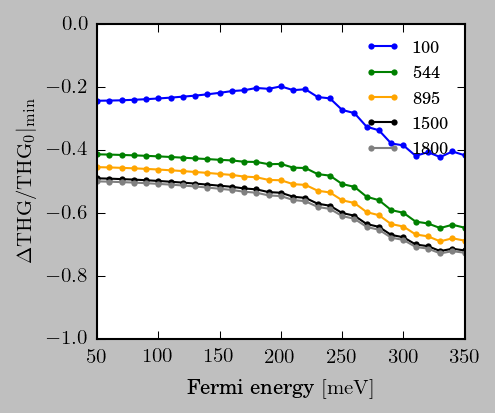

In [11]:
# Plot the modulation as a function of the Fermi energy.
mpl.style.use(["classic", "latex"])
# cmap = mpl.cm.get_cmap("jet")
mycolors = ["red", "blue", "green", "orange", "black", "gray"]
plt.figure(figsize=(3.5,3.0), frameon=True, dpi=150)
plt.axes([0.2, 0.2, 0.7, 0.7])
for ic,(data,info) in enumerate(zip(modulation_list[1:], data_dirs[1:])):
    plt.plot(data[:,0] * 1.0e+3, data[:,1], "-o", ms=3.0, mec="none", label=info[1], color=mycolors[1:][ic] )  # color=cmap(ic/(len(data_dirs) - 1.0))
#plt.xlim([0.0, 1.0])
plt.ylim([-1.0, 0.0])
plt.xlabel(r"Fermi energy $[{\rm meV}]$")
# plt.ylabel(r"$\eta_{\rm THG}$")
plt.ylabel(r"$\Delta{\rm THG}/{\rm THG}_{0}\vert_{\rm min}$")
plt.legend(frameon=False, loc="upper right", fontsize=8)
plt.savefig("%s/plot_modulations.png" % saveDir, dpi=300)

In [12]:
# Save data for the latest plot.
modulation_plot_df = np.c_[modulation_list[0][:,0]*1.0e+3,
                           modulation_list[1][:,1],
                           modulation_list[2][:,1],
                           modulation_list[3][:,1],
                           modulation_list[4][:,1],
                           modulation_list[5][:,1]]
np.savetxt("%s/modulation_plot.csv" % saveDir, modulation_plot_df, delimiter=",")